<a href="https://colab.research.google.com/github/khanhtran94/LearnConda/blob/master/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

invoking the dependencied

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

define the parameters

In [0]:
learning_parameter = 0.01
epochs = 300

creating the dataset of linear regression
here the line is y = Ax

In [0]:
sample_points = 50

x_train = np.linspace(0,30,sample_points)
y_train = 6 * x_train + 7*np.random.randn(sample_points)

plot the dataset

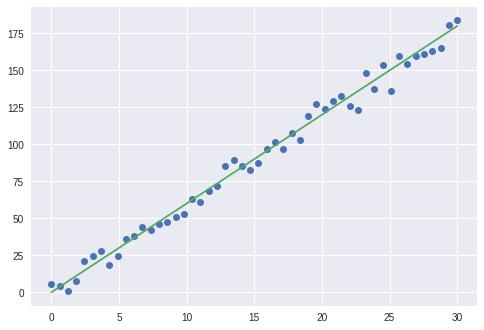

In [0]:
#noisy dataset
plt.plot(x_train, y_train, 'o')
#noisy free dataset
plt.plot(x_train, 6*x_train)
plt.show()

In [0]:
# define the tensorflow definations

Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')

# create the model for regression

prediction = W*X + B

# cost function
cost_iteration = tf.reduce_sum((prediction - Y)**2)/(2*sample_points)

#define the optimizer
optimized = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

#initialize the variables
init = tf.global_variables_initializer()

Epochs 0.000000 cost 1.510353 Weight 5.752053 Bias -1.052598
Epochs 40.000000 cost 0.231625 Weight 5.996341 Bias -0.904327
Epochs 80.000000 cost 0.233394 Weight 5.991755 Bias -0.785118
Epochs 120.000000 cost 0.235002 Weight 5.987604 Bias -0.677170
Epochs 160.000000 cost 0.236460 Weight 5.983845 Bias -0.579422
Epochs 200.000000 cost 0.237786 Weight 5.980441 Bias -0.490908
Epochs 240.000000 cost 0.238990 Weight 5.977358 Bias -0.410754
Epochs 280.000000 cost 0.240083 Weight 5.974566 Bias -0.338174


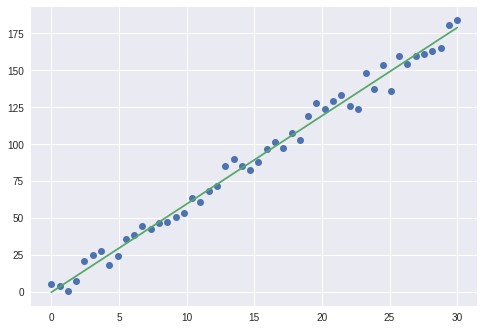

In [13]:
#Define the tensorflow session

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimized, feed_dict = {X: x, Y: y})
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X: x, Y: y})
      print('Epochs %f cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  
  Weight = sess.run(W)
  Bias = sess.run(B)
  
  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train, Weight*x_train+Bias)
  plt.show()